In [61]:
library(Seurat)
library(dplyr)
WT_PATH<- "data/WT_TRAF6_10X/filtered_gene_bc_matrices/mm10"
KO_PATH<- "data/KO_TRAF6_10X/filtered_gene_bc_matrices/mm10"

In [62]:
wt_data <- Read10X(data.dir = WT_PATH)
ko_data <- Read10X(data.dir = KO_PATH)
dim(wt_data)
dim(ko_data)

[1] 28692  2880

[1] 28692  2341

In [63]:
wt = CreateSeuratObject(counts = wt_data, project = "traf6", min.cells = 3, min.features = 200)
ko = CreateSeuratObject(counts = ko_data, project = "traf6", min.cells = 3, min.features = 200)

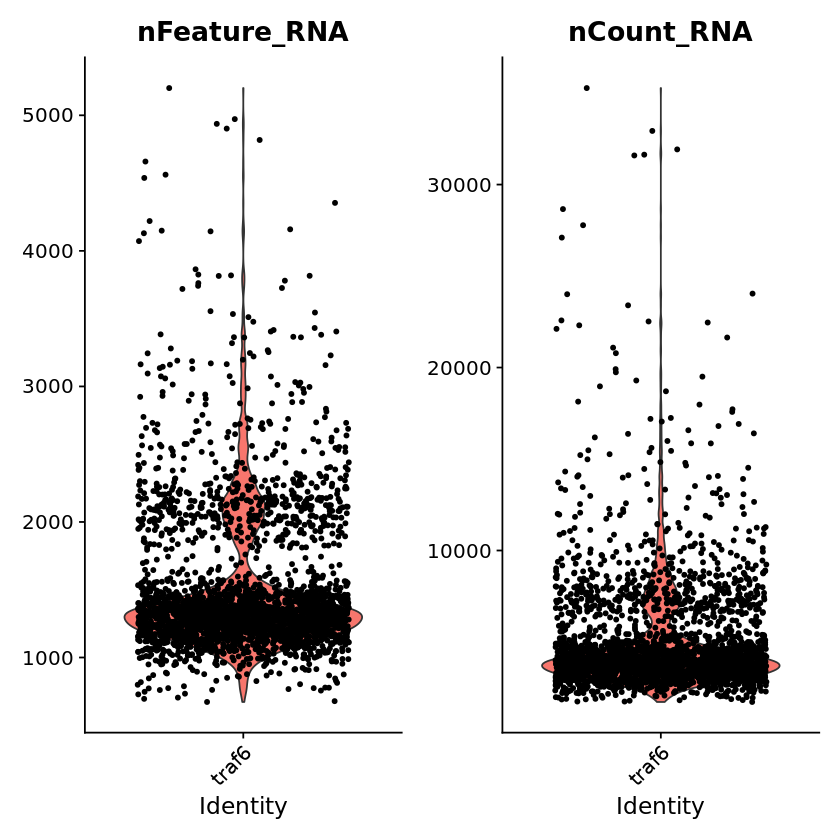

In [64]:
VlnPlot(wt, features = c("nFeature_RNA", "nCount_RNA"), ncol=2)

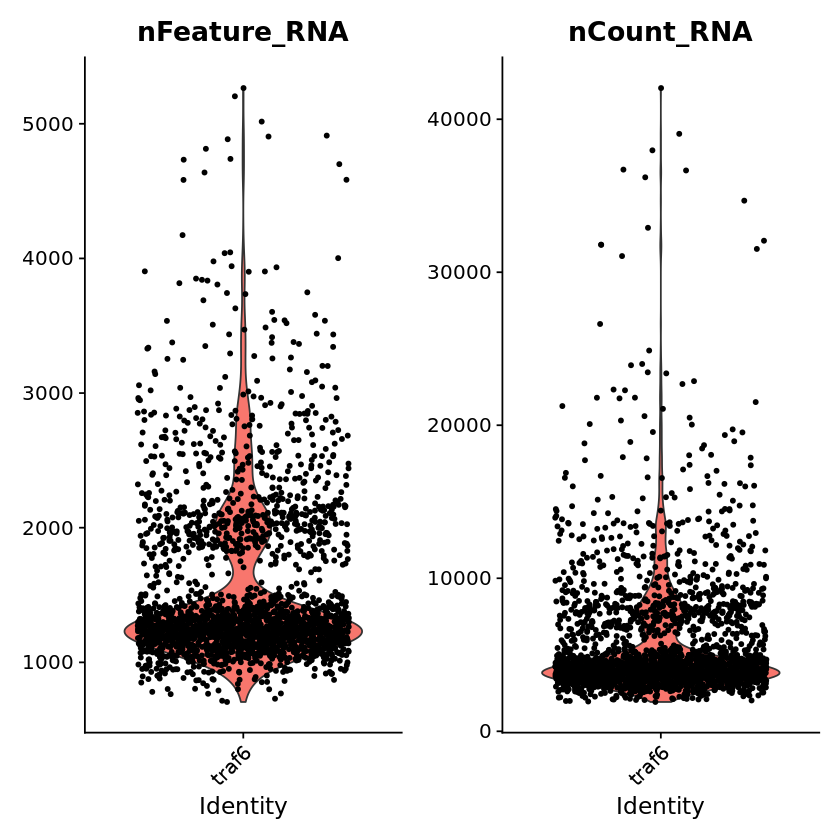

In [65]:
VlnPlot(ko, features = c("nFeature_RNA", "nCount_RNA"), ncol=2)

In [66]:
wt = subset(wt, subset = nFeature_RNA > 200 & nFeature_RNA < 2500)
ko = subset(ko, subset = nFeature_RNA > 200 & nFeature_RNA < 2500)

In [67]:
wt = NormalizeData(wt)
ko = NormalizeData(ko)

In [68]:
wt = FindVariableFeatures(wt, selection.method = "vst", nfeatures = 2000)
ko = FindVariableFeatures(ko, selection.method = "vst", nfeatures = 2000)

When using repel, set xnudge and ynudge to 0 for optimal results



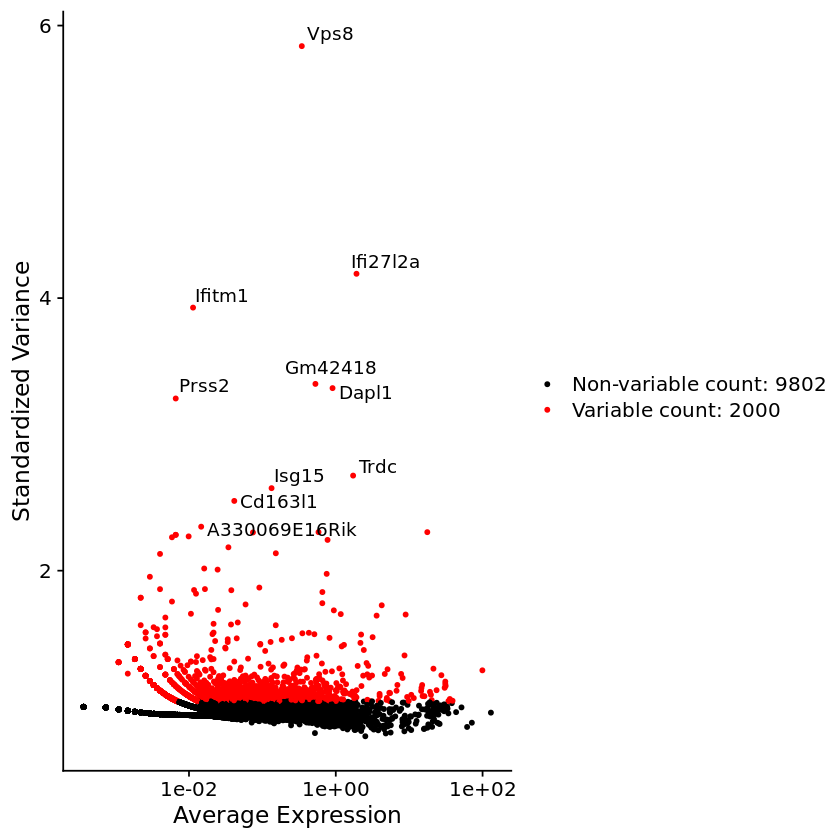

In [69]:
# Identify the 10 most highly variable genes
top10 = head(VariableFeatures(wt), 10)

# plot variable features with and without labels
plot1 = VariableFeaturePlot(wt)
plot2 = LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”


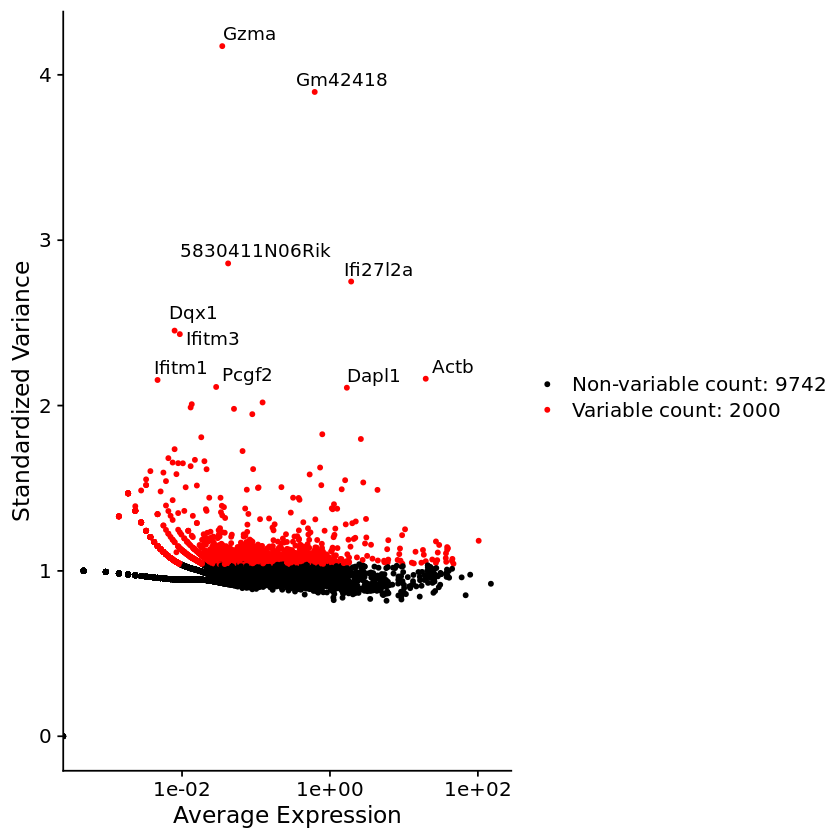

In [70]:
# Identify the 10 most highly variable genes
top10 = head(VariableFeatures(ko), 10)

# plot variable features with and without labels
plot1 = VariableFeaturePlot(ko)
plot2 = LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

In [71]:
wt.genes <- rownames(wt)
wt <- ScaleData(wt, features = wt.genes)

ko.genes <- rownames(ko)
ko <- ScaleData(ko, features = ko.genes)

Centering and scaling data matrix

Centering and scaling data matrix



In [72]:
wt <- RunPCA(wt, features = VariableFeatures(object = wt))
ko <- RunPCA(wt, features = VariableFeatures(object = ko))

PC_ 1 
Positive:  Lgals1, Ahnak, S100a4, S100a6, Crip1, Lgals3, Id2, Cxcr6, Itgb7, Nkg7 
	   Vim, Actb, Cx3cr1, Ccr2, Itgb1, Gzmb, Zeb2, Spn, Anxa1, Jund 
	   Klrk1, Ptprc, Klrc1, Samhd1, Pim1, Ikzf2, Ifngr1, Lrrfip1, Slco3a1, Rora 
Negative:  Rpl13, Rpl32, Rps18, Rps28, Rps5, Rpl12, Rps6, Rpl18a, Rplp0, Rps19 
	   Rps20, Rpl36a, Rpsa, Rps12, Rps4x, Rpl3, Rps2, Rps11, Rpl10a, Rps18-ps3 
	   Rpl41, Eef1b2, Gm8730, Eef1g, Sell, Dapl1, Rpl22l1, Nsg2, Fam101b, Xcl1 
PC_ 2 
Positive:  Lgals1, Tmem176a, Actb, Maf, Id2, Tmem176b, Cd163l1, S100a6, Cxcr6, Nebl 
	   S1pr5, Crip1, 5830411N06Rik, Actn2, Cd40lg, S100a4, Klrb1c, Serpinb1a, Sox13, Ckb 
	   Tnfrsf25, Selm, Il17re, Ramp1, Klrc1, Lbhd1, Ikzf2, Lilrb4a, Trib1, Espn 
Negative:  Rps18, Plac8, Rpl32, Rpl13, Rps5, Rplp0, Rps19, Rpl12, Rpl3, Rps20 
	   Rps28, Rps6, Rpsa, Dapl1, Rps12, Gm8730, Stat1, Ifit1, Rps2, Rpl10a 
	   Rpl18a, Rps18-ps3, Wnk1, Rpl36a, Rps11, Rtp4, Sell, Ccnd2, Nsa2, Ikzf1 
PC_ 3 
Positive:  Ccl5, Ly6c2, Nkg7, AW112010, C

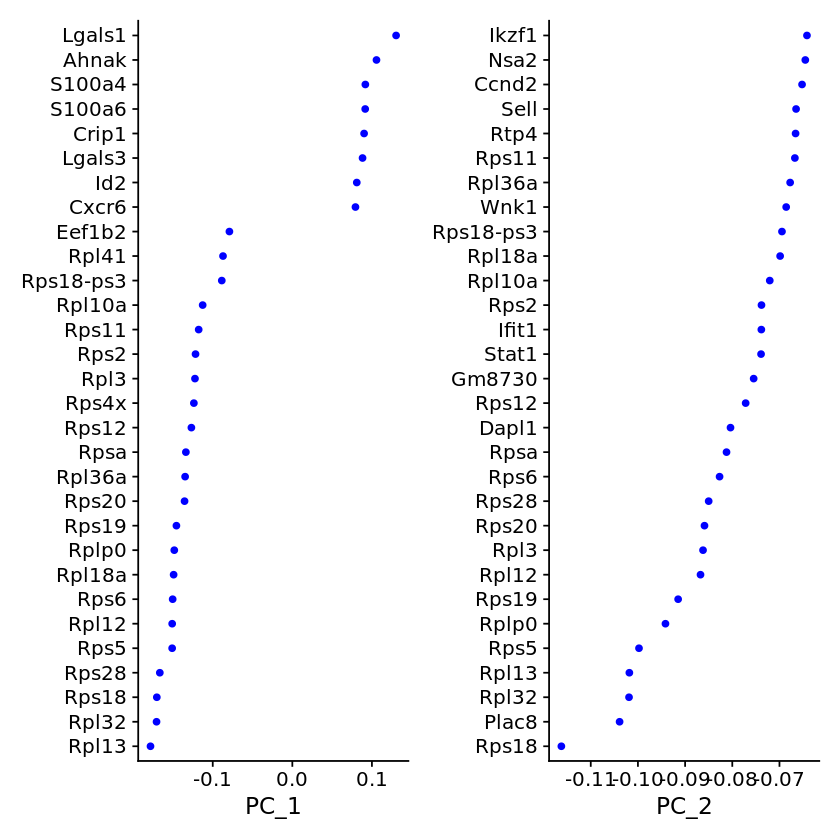

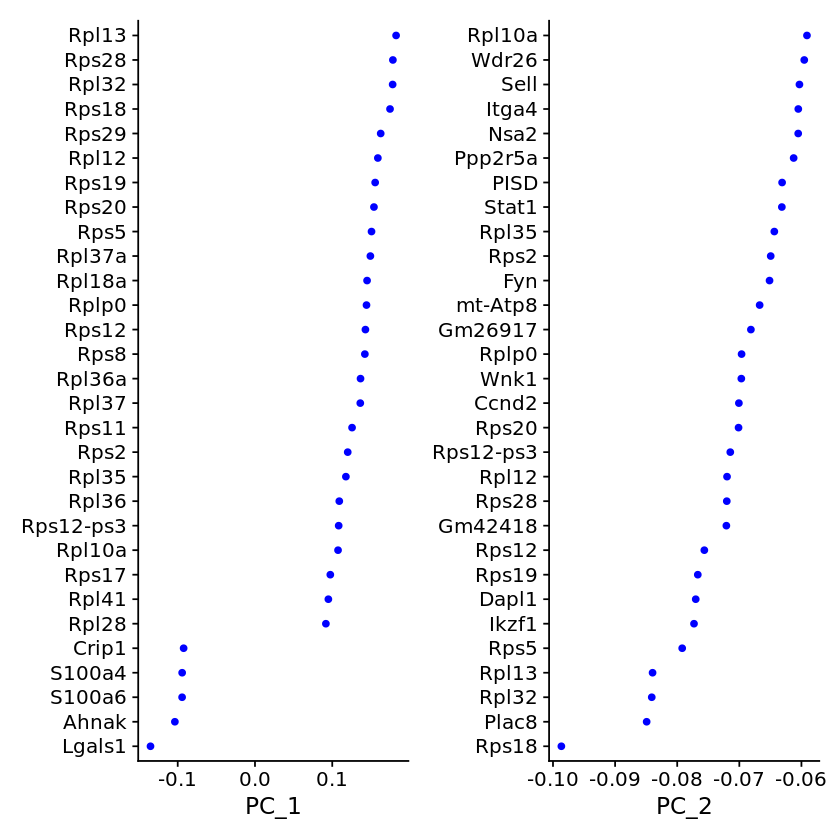

In [73]:
VizDimLoadings(wt, dims = 1:2, reduction = "pca")
VizDimLoadings(ko, dims = 1:2, reduction = "pca")

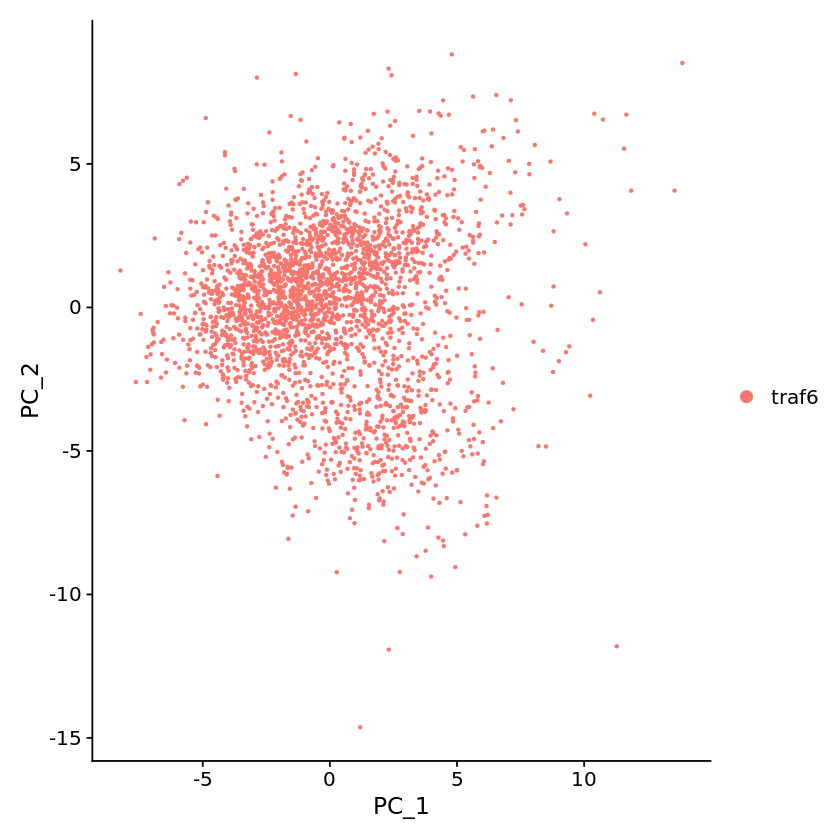

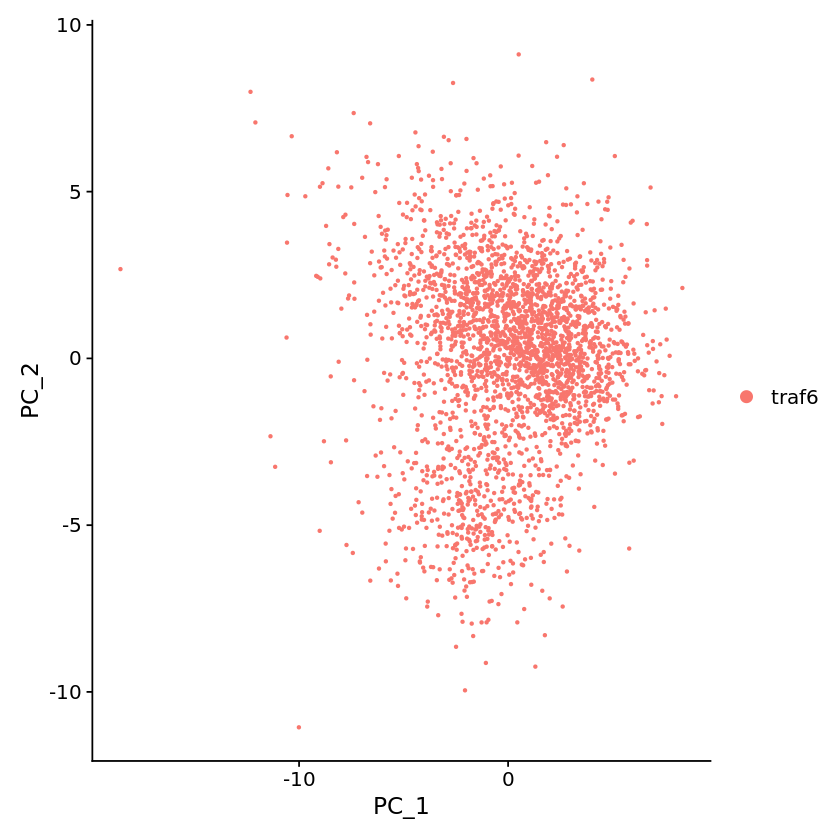

In [74]:
DimPlot(wt, reduction = "pca")
DimPlot(ko, reduction = "pca")

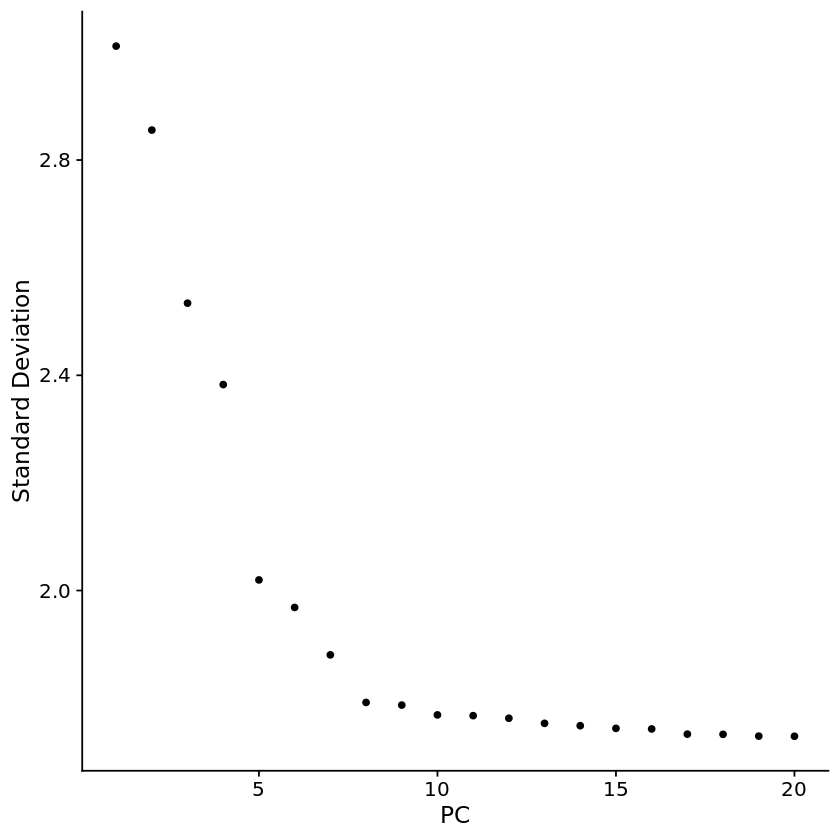

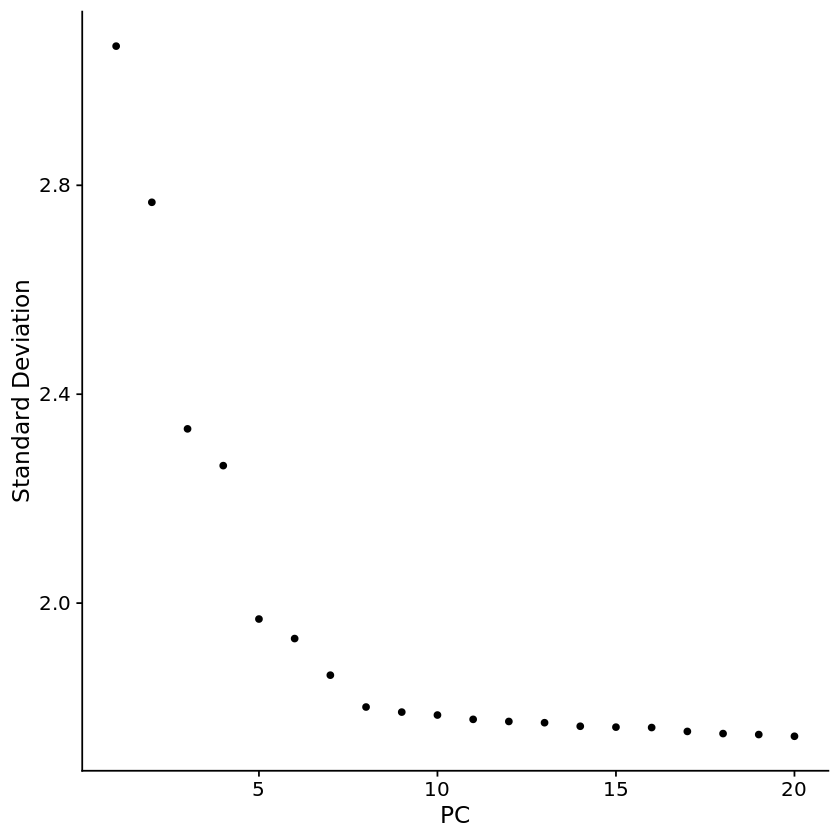

In [75]:
ElbowPlot(wt)
ElbowPlot(ko)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2729
Number of edges: 88678

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7044
Number of communities: 5
Elapsed time: 0 seconds


21:49:54 UMAP embedding parameters a = 0.9922 b = 1.112

21:49:54 Read 2729 rows and found 10 numeric columns

21:49:54 Using Annoy for neighbor search, n_neighbors = 30

21:49:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:49:54 Writing NN index file to temp file /tmp/RtmpBv1xPU/file405a1418ba7f

21:49:54 Searching Annoy index using 1 thread, search_k = 3000

21:49:55 Annoy recall = 100%

21:49:55 Commencing smooth kNN distance calibration using 1 thread

21:49:55 Initializing from normalized Laplacian + noise

21:49:55 Commencing optimization for 500 epochs, with 101900 positive edges

21:49:58 Optimization finished



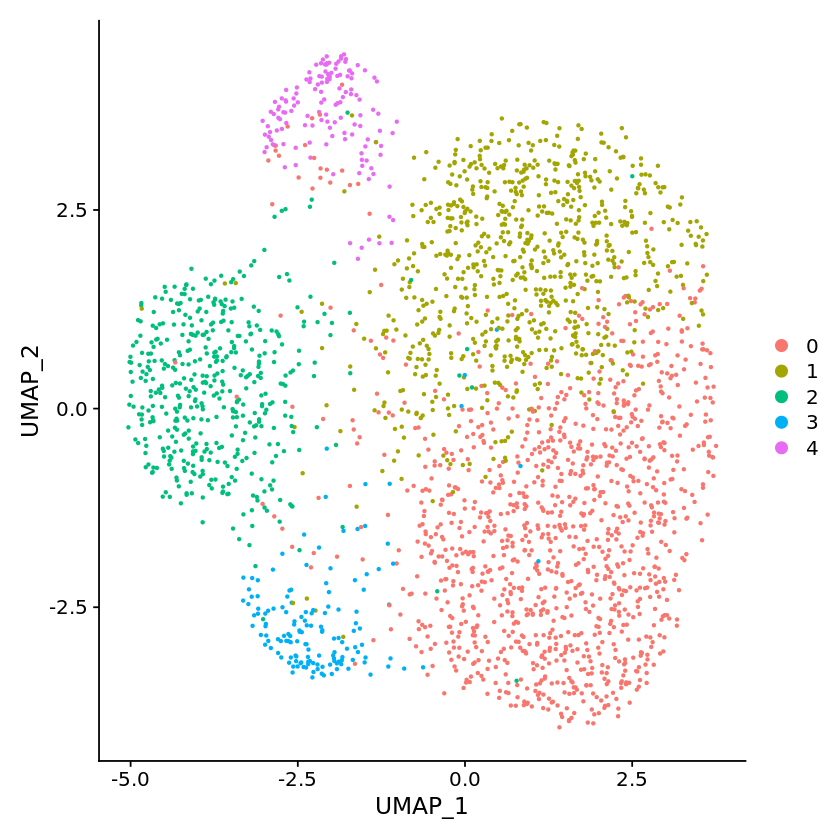

In [76]:
wt = FindNeighbors(wt, dims = 1:10)
wt = FindClusters(wt, resolution = 0.6)
wt = RunUMAP(wt, dims = 1:10)
DimPlot(wt, reduction = "umap")

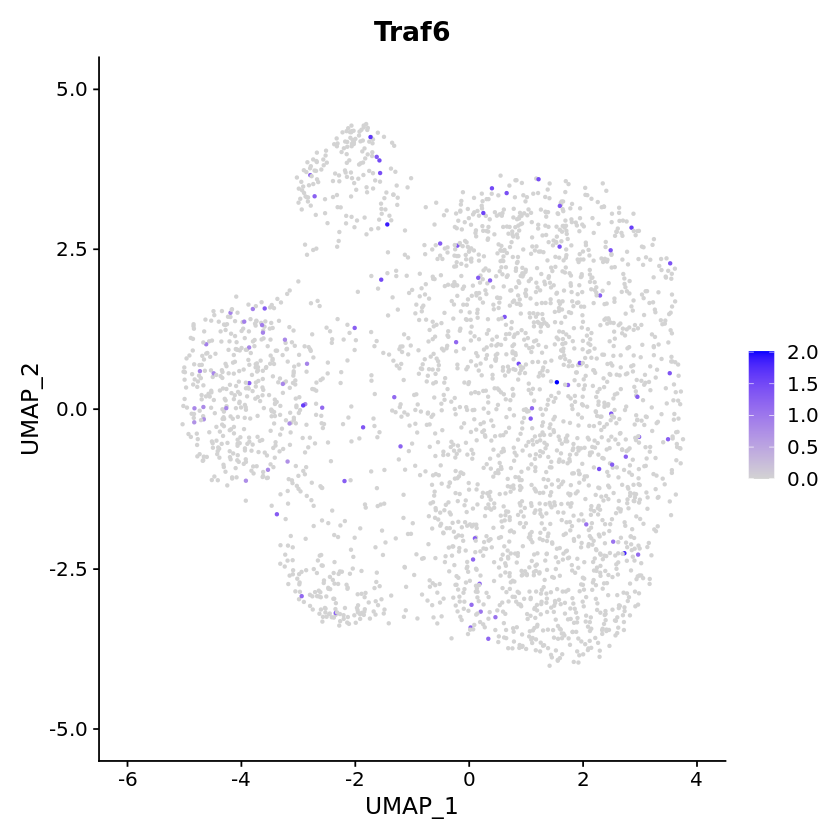

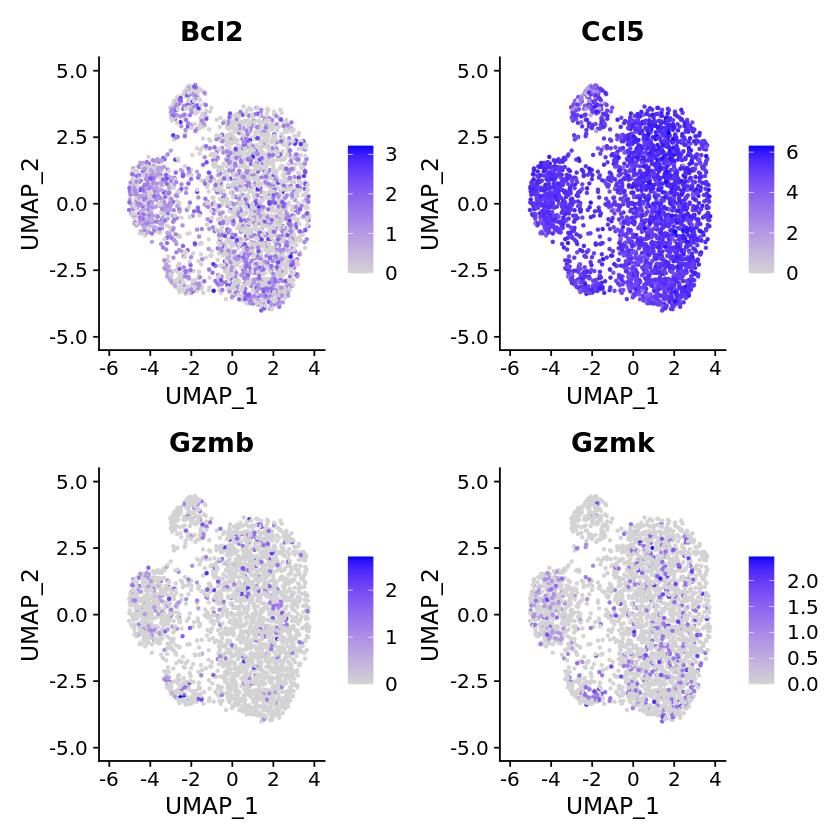

In [77]:
# https://www.jimmunol.org/content/190/3/940
# https://www.nature.com/articles/s41467-019-12464-3
FeaturePlot(wt, features = c("Traf6"))
FeaturePlot(wt, features = c("Bcl2", "Ccl5", "Gzmb", "Gzmk"))

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2729
Number of edges: 89522

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7053
Number of communities: 5
Elapsed time: 0 seconds


21:50:12 UMAP embedding parameters a = 0.9922 b = 1.112

21:50:12 Read 2729 rows and found 10 numeric columns

21:50:12 Using Annoy for neighbor search, n_neighbors = 30

21:50:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

21:50:12 Writing NN index file to temp file /tmp/RtmpBv1xPU/file405a91de952

21:50:12 Searching Annoy index using 1 thread, search_k = 3000

21:50:13 Annoy recall = 100%

21:50:13 Commencing smooth kNN distance calibration using 1 thread

21:50:14 Initializing from normalized Laplacian + noise

21:50:14 Commencing optimization for 500 epochs, with 102244 positive edges

21:50:16 Optimization finished



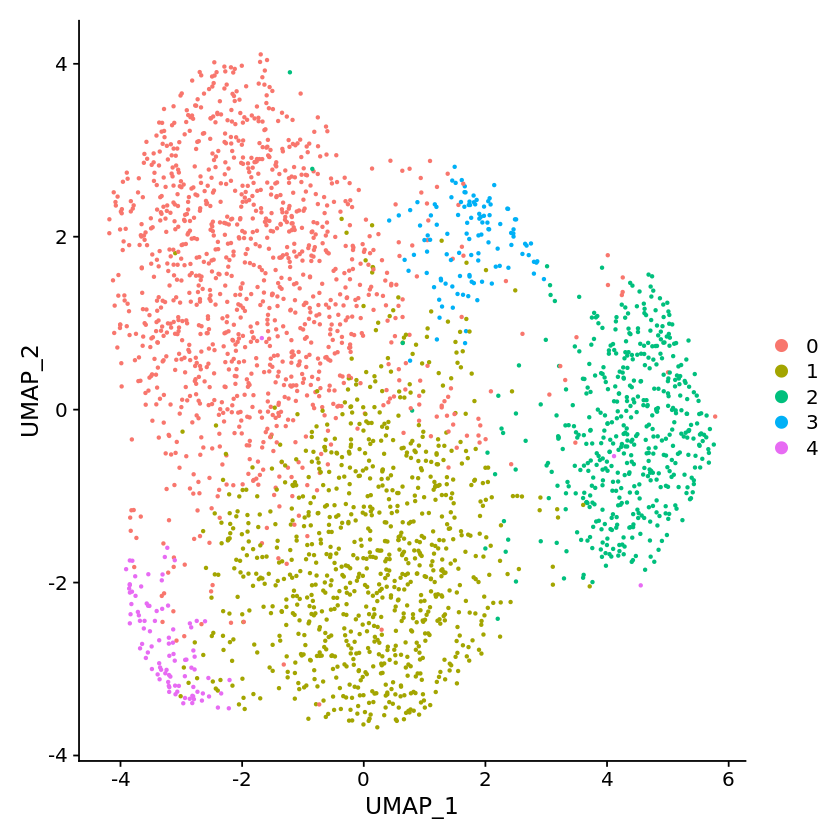

In [78]:
ko = FindNeighbors(ko, dims = 1:10)
ko = FindClusters(ko, resolution = 0.6)
ko = RunUMAP(ko, dims = 1:10)
DimPlot(ko, reduction = "umap")

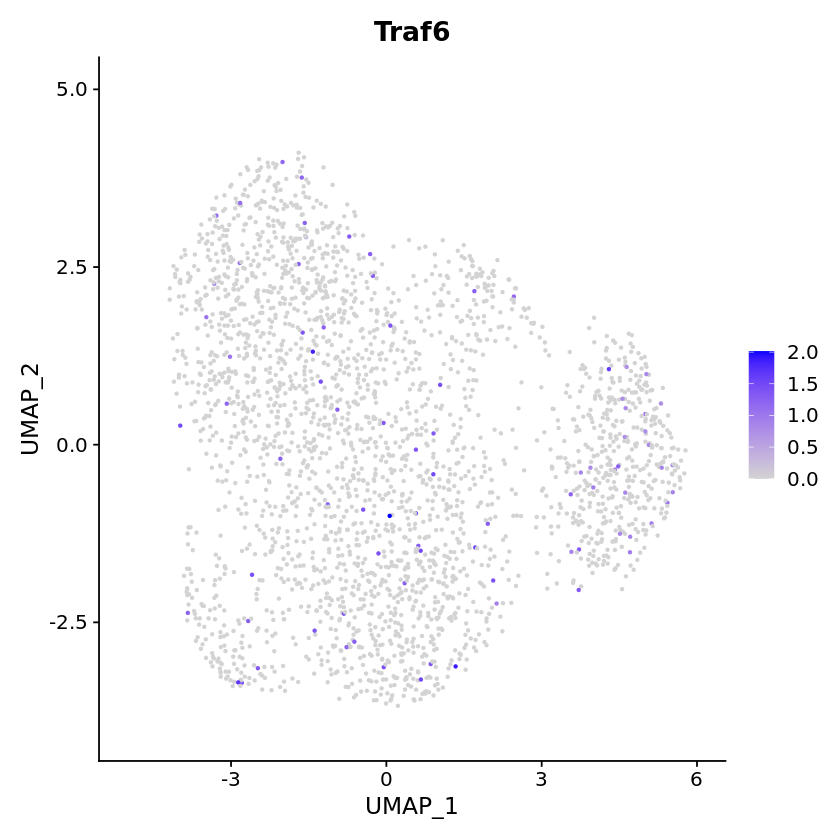

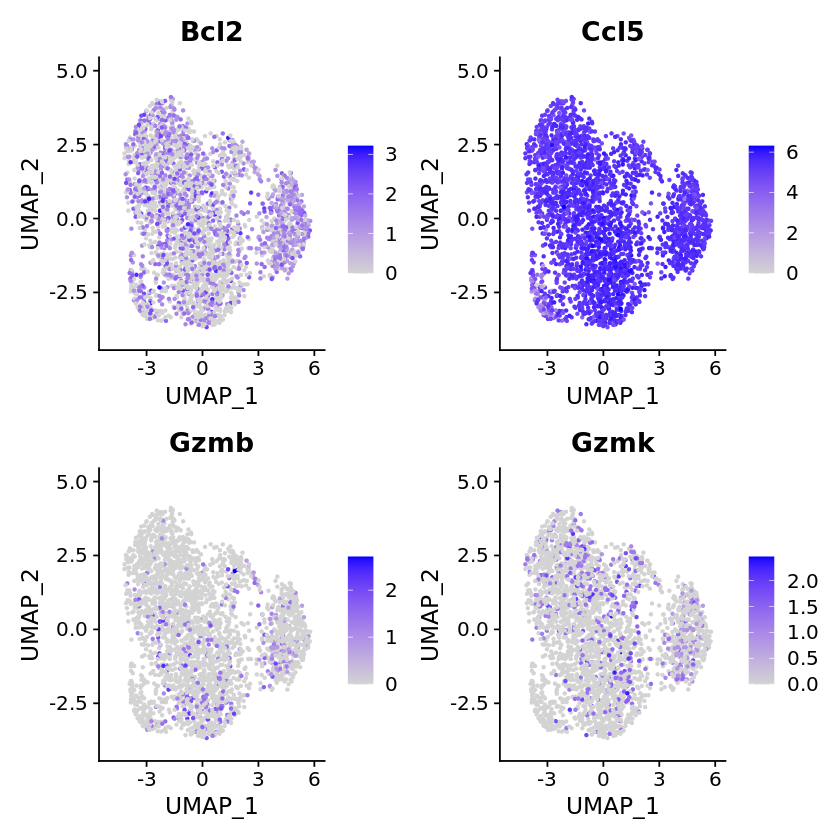

In [79]:
FeaturePlot(ko, features = c("Traf6"))
FeaturePlot(ko, features = c("Bcl2", "Ccl5", "Gzmb", "Gzmk"))